# Sprint 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
red = pd.read_csv("winequality-red.csv")
white = pd.read_csv("winequality-white.csv")

In [4]:
red.dtypes
white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red.tail()
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
# red.info()
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
red.isna().count()
white.isna().count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [9]:
red.describe()
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
def define_quality_labels(v):
  if v <= 5:
    return 'low'
  if v <= 7:
    return 'medium'
  return 'high'

In [11]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red['quality_label'] = red['quality'].apply(define_quality_labels)
white['quality_label'] = white['quality'].apply(define_quality_labels)

red['color'] = 'red'
white['color'] = 'white'

# here we are transforming these labels into a categorical data type (specific to pandas) instead of a simple string
white['quality_label'] = pd.Categorical(white['quality_label'], categories=['low', 'medium', 'high'])

In [12]:
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium,white


In [13]:
white['bound_sulfur_dioxide'] = white['total sulfur dioxide'] - white['free sulfur dioxide']
red['bound_sulfur_dioxide'] = red['total sulfur dioxide'] - red['free sulfur dioxide']

In [14]:
red.columns = red.columns.str.replace(" ", "_")
white.columns = white.columns.str.replace(" ", "_")

combined = pd.concat([red, white], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
 13  color                 6497 non-null   object 
 14  bound_sulfur_dioxide  6497 non-null   float64
dtypes: float64(12), int64

In [15]:
selected_properties = ['residual_sugar', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 'volatile_acidity', 'quality']
pd.concat([
  red[selected_properties].describe(), 
  white[selected_properties].describe()], 
  axis=1, 
  keys=["Red Wines Stats", "White Wines Stats"]
)


Red Wines Stats                                                 \
       residual_sugar total_sulfur_dioxide    sulphates      alcohol   
count     1599.000000          1599.000000  1599.000000  1599.000000   
mean         2.538806            46.467792     0.658149    10.422983   
std          1.409928            32.895324     0.169507     1.065668   
min          0.900000             6.000000     0.330000     8.400000   
25%          1.900000            22.000000     0.550000     9.500000   
50%          2.200000            38.000000     0.620000    10.200000   
75%          2.600000            62.000000     0.730000    11.100000   
max         15.500000           289.000000     2.000000    14.900000   

                                    White Wines Stats                       \
      volatile_acidity      quality    residual_sugar total_sulfur_dioxide   
count      1599.000000  1599.000000       4898.000000          4898.000000   
mean          0.527821     5.636023          6.391415           138.360657   
std           0.179060     0.807569          5.072058            42.498065   
min           0.120000     3.000000          0.600000             9.000000   
25%           0.390000     5.000000          1.700000           108.000000   
50%           0.520000     6.000000          5.200000           134.000000   
75%           0.640000     6.000000          9.900000           167.000000   
max           1.580000     8.000000         65.800000           440.000000   

                                                               
         sulphates      alcohol volatile_acidity      quality  
count  4898.000000  4898.000000      4898.000000  4898.000000  
mean      0.489847    10.514267         0.278241     5.877909  
std       0.114126     1.230621         0.100795     0.885639  
min       0.220000     8.000000         0.080000     3.000000  
25%       0.410000     9.500000         0.210000     5.000000  
50%       0.470000    10.400000         0.260000     6.000000  
75%       0.550000    11.400000         0.320000     6.000000  
max       1.080000    14.200000         1.100000     9.000000

In [16]:
# sulphates and volatile acid have higher mean in red wine (given)
# mean residual sugar and total sulfur dioxide higher in white wine
# mean alcohol and quality are almost the same

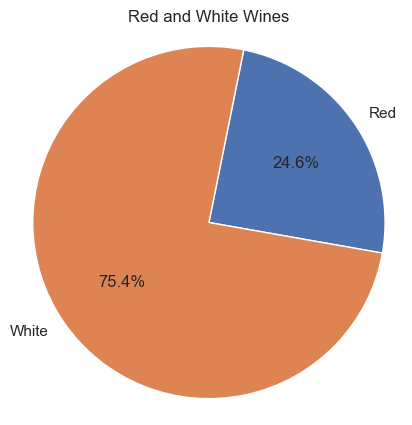

In [17]:
# Pie chart to show white/red
sns.set_theme(rc = {'figure.figsize':(5,5)})

pie_labels = 'Red', 'White'
sizes = [red.shape[0], white.shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=pie_labels, autopct='%1.1f%%', startangle=-10)
ax1.axis('equal')
plt.title("Red and White Wines")


plt.show()

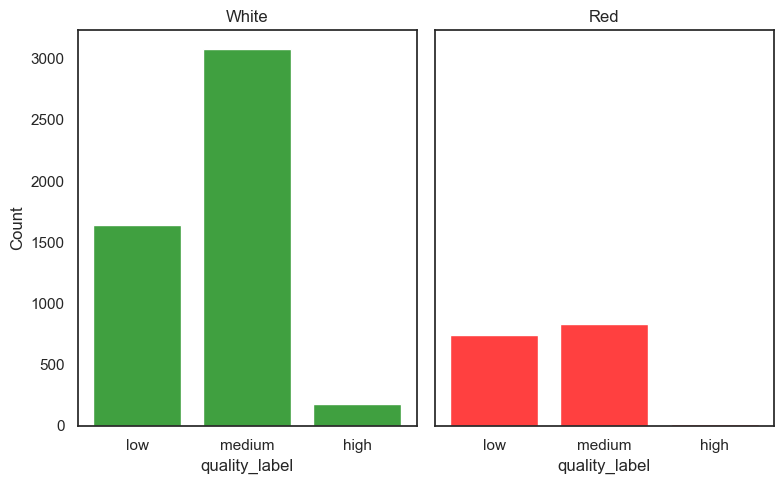

In [18]:
# distribution of qualities
sns.set_theme(rc = {'figure.figsize':(8,5)}, style='white')

fig2, ax2 = plt.subplots(1, 2, sharey="row", tight_layout=True)
ax2[0].set_title("White")
ax2[1].set_title("Red")

sns.histplot(data=white, x='quality_label', ax=ax2[0], color='green', shrink=0.8)
sns.histplot(data=red, x='quality_label', ax=ax2[1], color='red', shrink=0.8)


plt.show()

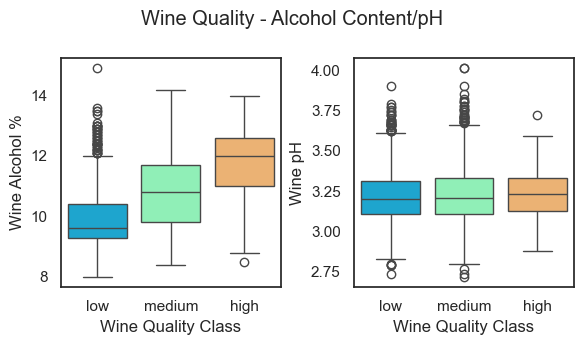

In [19]:
sns.set_theme(rc = {'figure.figsize':(6,3.5)}, style='white')

fig3, ax3 = plt.subplots(1, 2, tight_layout=True)
plt.suptitle('Wine Quality - Alcohol Content/pH')

ax3[0].set_xlabel('Wine Quality Class')
ax3[1].set_xlabel('Wine Quality Class')

ax3[0].set_ylabel('Wine Alcohol %')
ax3[1].set_ylabel('Wine pH')

sns.boxplot(data=combined, x='quality_label', y='alcohol', ax=ax3[0], palette='rainbow', hue='quality_label')
sns.boxplot(data=combined, x='quality_label', y='pH', ax=ax3[1], palette='rainbow', hue='quality_label')

plt.show()


In [20]:
# sns.pairplot(combined, hue='color')

<Axes: xlabel='residual_sugar', ylabel='Count'>

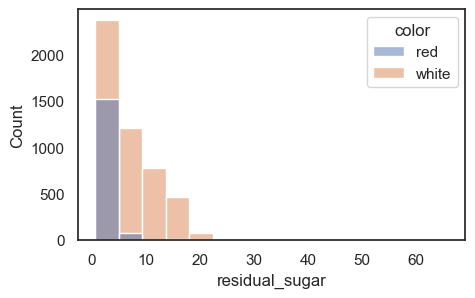

In [21]:
# residual sugar red/white comparison
sns.set_theme(rc = {'figure.figsize':(5,3)}, style='white')
sns.histplot(data=combined, x='residual_sugar', hue='color', bins=15)

# Sprint 2

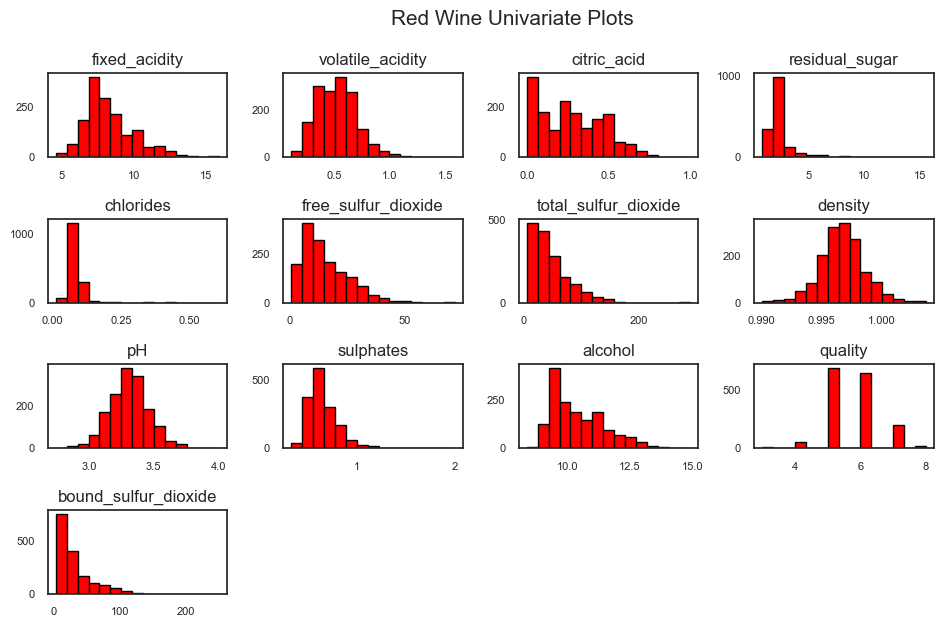

In [22]:
sns.set_theme(rc = {'figure.figsize':(8,5)}, style='white')

red.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

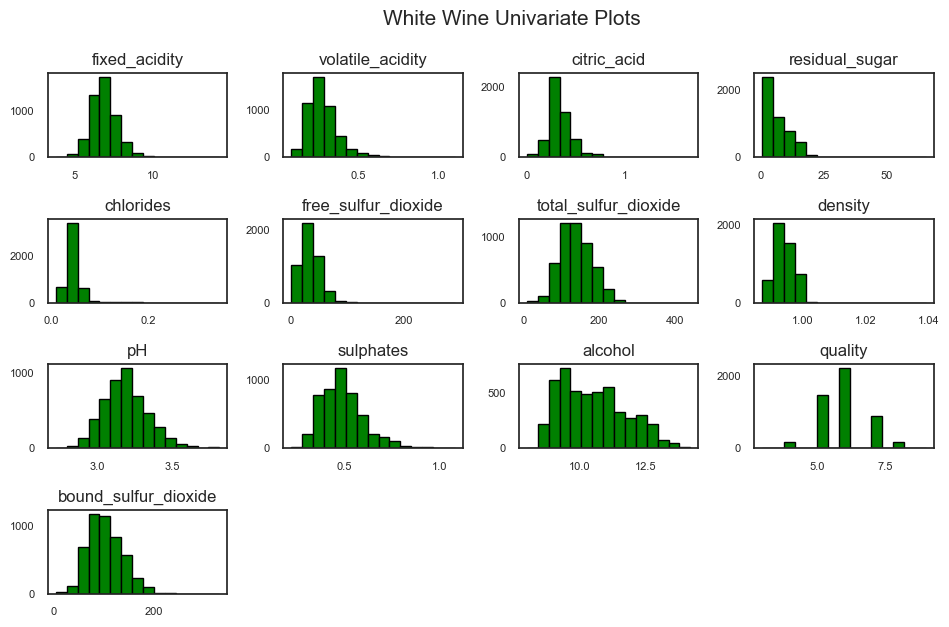

In [23]:
sns.set_theme(rc = {'figure.figsize':(8,5)}, style='white')

white.hist(bins=15, color='green', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

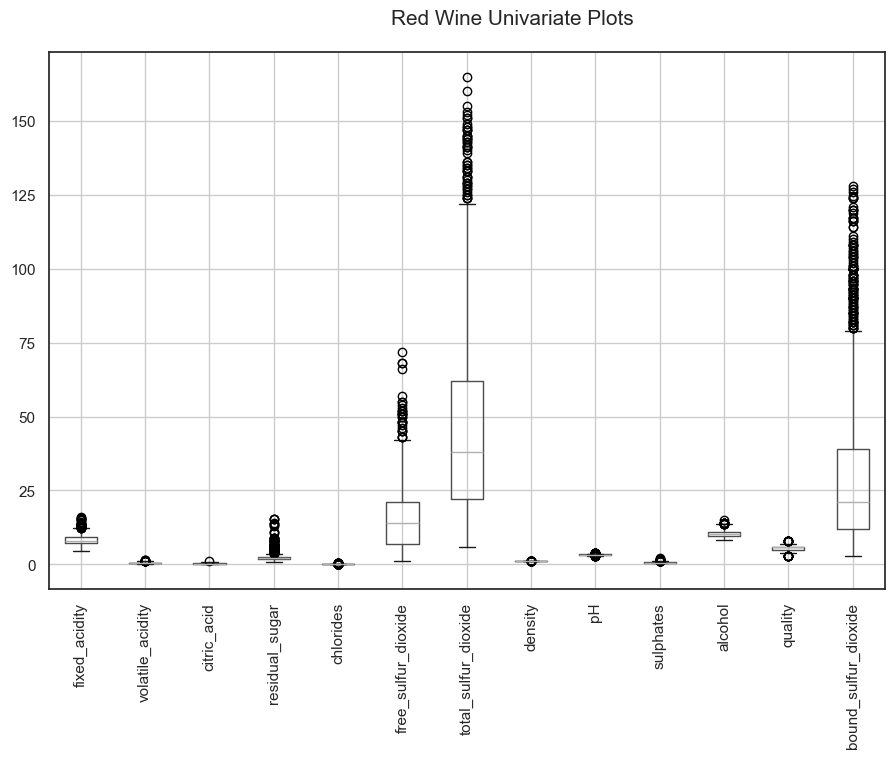

In [49]:
sns.set_theme(rc = {'figure.figsize':(8,5)}, style='white')

dfml_white = white.copy()
dfml_red = red.copy()

dfml_white = dfml_white[(dfml_white['total_sulfur_dioxide'] < 400) & (dfml_white['free_sulfur_dioxide'] < 200) & (dfml_white['residual_sugar'] < 50)]
dfml_red = dfml_red[dfml_red['total_sulfur_dioxide'] < 200]
dfml_red.boxplot()
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [45]:
dfml_red[(dfml_red['total_sulfur_dioxide'] > 200)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,color,bound_sulfur_dioxide
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7,medium,red,240.5
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7,medium,red,251.5


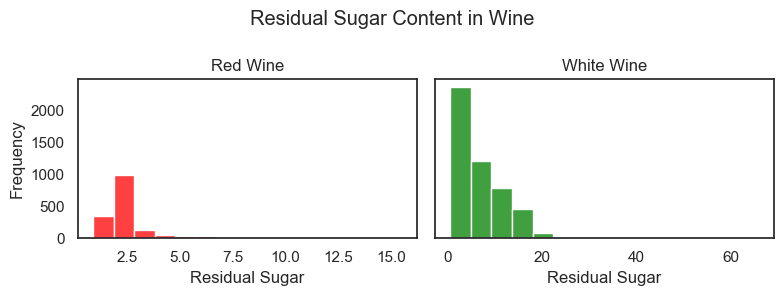

In [25]:
sns.set_theme(rc = {'figure.figsize':(8,3)}, style='white')

fig5, ax5 = plt.subplots(1, 2, sharey="row", tight_layout=True)
plt.suptitle('Residual Sugar Content in Wine')
ax5[1].set_title("White Wine")
ax5[0].set_title("Red Wine")

sns.histplot(data=white, x='residual_sugar', ax=ax5[1], color='green', bins=15)
sns.histplot(data=red, x='residual_sugar', ax=ax5[0], color='red', bins=15)

ax5[0].set_xlabel('Residual Sugar')
ax5[1].set_xlabel('Residual Sugar')

ax5[0].set_ylabel('Frequency')
ax5[1].set_ylabel('Frequency')

plt.show()

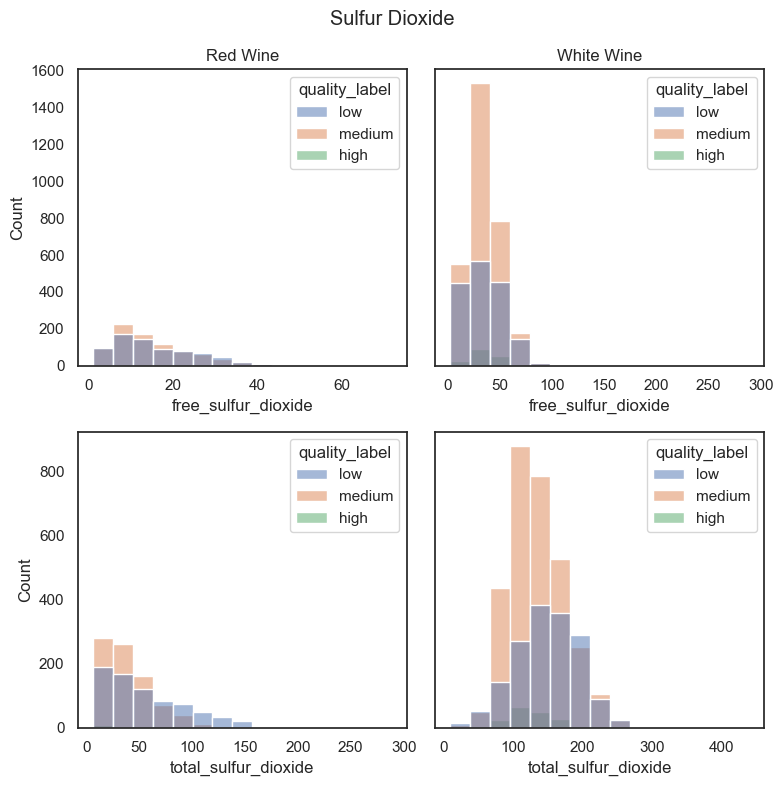

In [26]:
sns.set_theme(rc = {'figure.figsize':(8,8)}, style='white')

fig6, ax6 = plt.subplots(2, 2, sharey="row", tight_layout=True)
plt.suptitle('Sulfur Dioxide')
ax6[0,1].set_title("White Wine")
ax6[0,0].set_title("Red Wine")

sns.histplot(data=white, x='free_sulfur_dioxide', ax=ax6[0,1], color='green', bins=15, hue='quality_label')
sns.histplot(data=red, x='free_sulfur_dioxide', ax=ax6[0,0], color='red', bins=15, hue='quality_label')

sns.histplot(data=white, x='total_sulfur_dioxide', ax=ax6[1,1], color='green', bins=15, hue='quality_label')
sns.histplot(data=red, x='total_sulfur_dioxide', ax=ax6[1,0], color='red', bins=15, hue='quality_label')

# ax6[0].set_xlabel('Total Sulfur Dioxide')
# ax6[1].set_xlabel('Total Sulfur Dioxide')

# ax6[0].set_ylabel('Frequency')
# ax6[1].set_ylabel('Frequency')

plt.show()

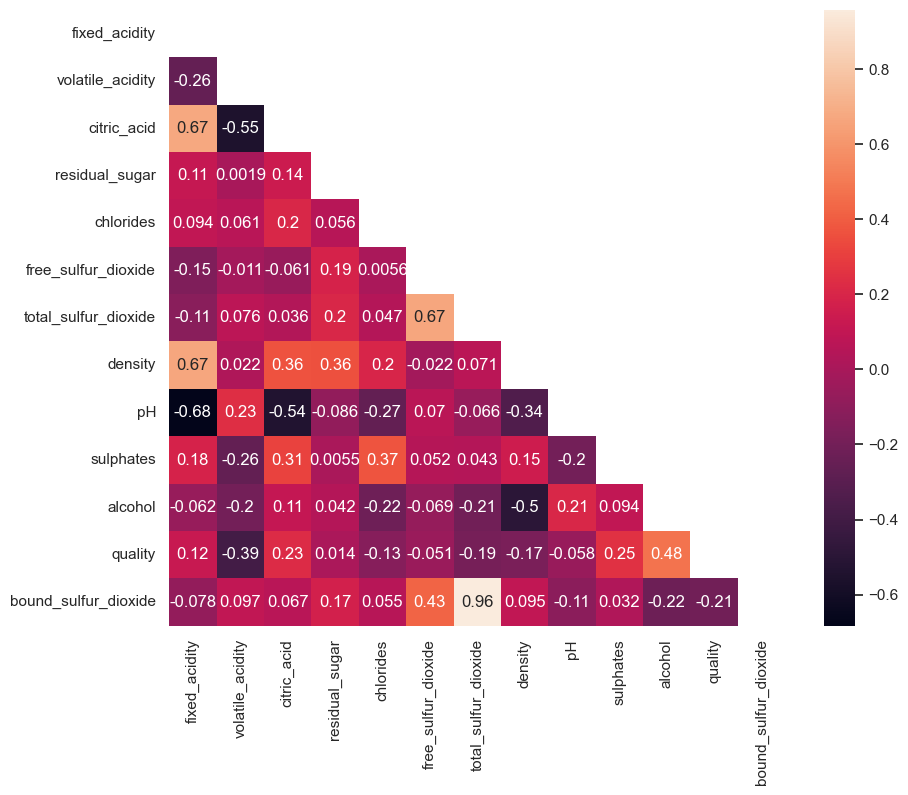

In [27]:
sns.set_theme(rc = {'figure.figsize':(10,8)}, style='white')

corr_red = red.drop(['color', 'quality_label'], axis=1).corr()
# corr_white = white.drop(['color', 'quality_label'], axis=1).corr()
sns.heatmap(
  corr_red, 
  annot=True, 
  mask = np.triu(np.ones_like(corr_red, dtype=bool)),
  square=True
)
plt.xticks(rotation=90)
plt.show()

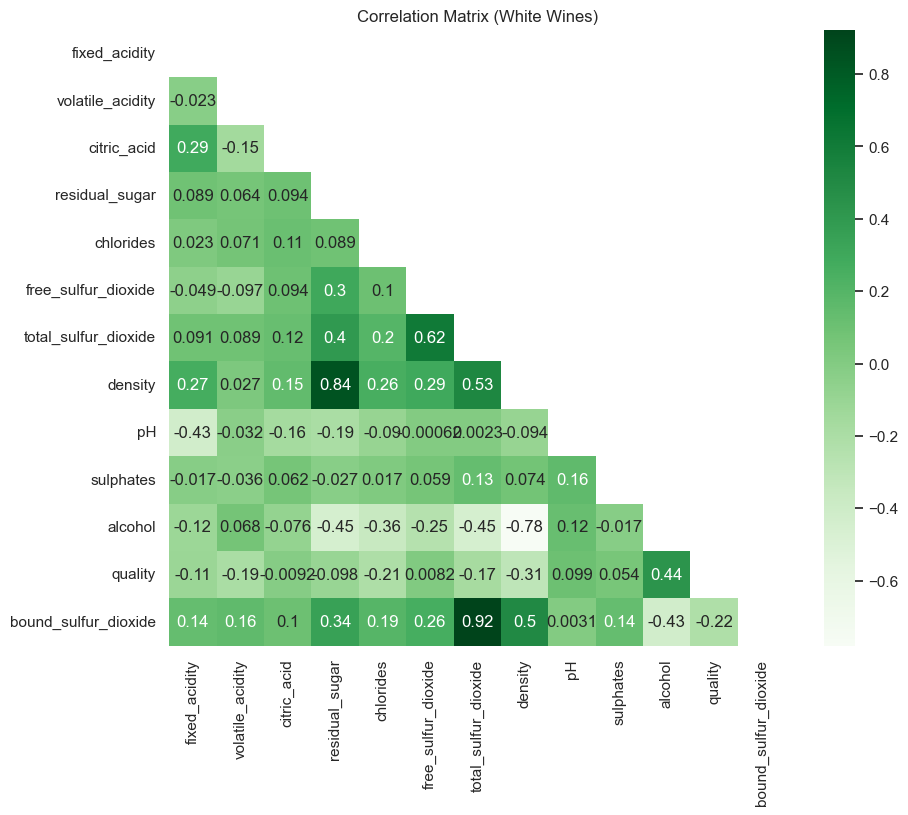

In [28]:
sns.set_theme(rc = {'figure.figsize':(10,8)}, style='white')

corr = white.drop(['color', 'quality_label'], axis=1).corr()


sns.heatmap(
  corr, 
  annot=True, 
  mask = np.triu(np.ones_like(corr, dtype=bool)),
  square=True,
  cmap='Greens'
)
plt.xticks(rotation=90)
plt.title("Correlation Matrix (White Wines)")
plt.show()

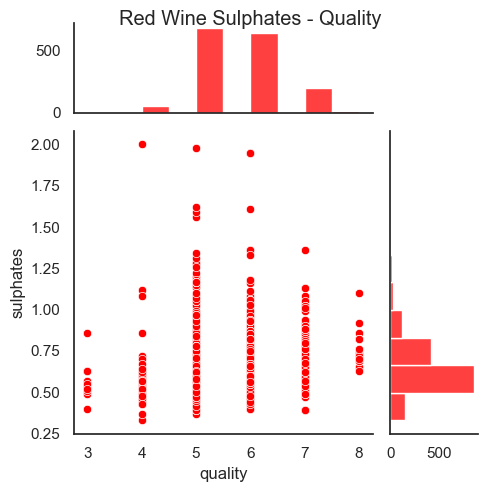

In [29]:
sns.jointplot(data=red, x='quality', y='sulphates', height=5, ratio=3, color='red', marginal_ticks=True, marginal_kws={ 'bins': 10 })
plt.suptitle('Red Wine Sulphates - Quality')
plt.show()


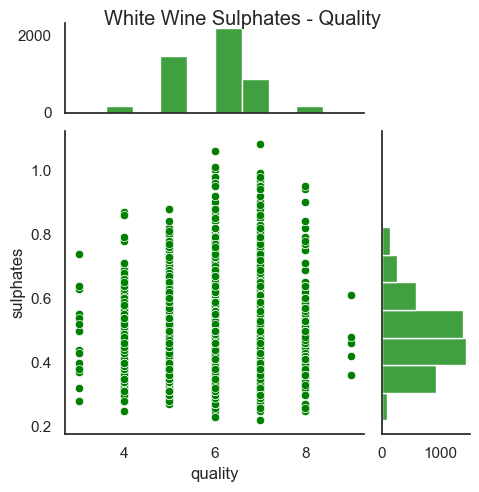

In [30]:
sns.jointplot(data=white, x='quality', y='sulphates', height=5, ratio=3, color='green', marginal_ticks=True, marginal_kws={ 'bins': 10 })
plt.suptitle('White Wine Sulphates - Quality')
plt.show()

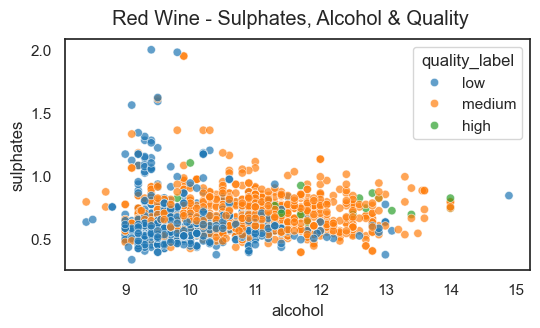

In [31]:
sns.set_theme(rc = {'figure.figsize':(6,3)}, style='white')

sns.scatterplot(data=red, x='alcohol', y='sulphates', hue='quality_label', palette='tab10', alpha=0.7)
plt.suptitle('Red Wine - Sulphates, Alcohol & Quality')
plt.show()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,color,bound_sulfur_dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red,23.0


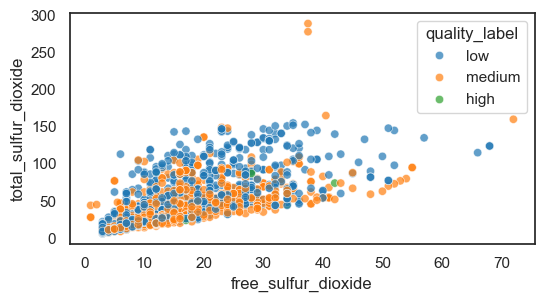

In [32]:
sns.set_theme(rc = {'figure.figsize':(6,3)}, style='white')

sns.scatterplot(data=red, x='free_sulfur_dioxide', y='total_sulfur_dioxide', hue='quality_label', palette='tab10', alpha=0.7)

red.head()

In [33]:
from scipy import stats

F, p = stats.f_oneway(
  red[red['quality_label'] == 'low']['alcohol'],
  red[red['quality_label'] == 'medium']['alcohol'],
  red[red['quality_label'] == 'high']['alcohol']
)

print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 205.23448800361507 	p-value: 4.776936653588672e-80


In [34]:
sulfur_dioxides = ['total_sulfur_dioxide', 'free_sulfur_dioxide', 'bound_sulfur_dioxide']

so2_white_quality_means = white.groupby('quality_label', observed=True)[sulfur_dioxides].mean()
so2_red_quality_means = red.groupby('quality_label', observed=True)[sulfur_dioxides].mean()
so2_combined_quality_means = combined.groupby('quality_label', observed=True)[sulfur_dioxides].mean()

print('white', so2_white_quality_means, '\n') 
print('red', so2_red_quality_means, '\n') 
print('combined', so2_combined_quality_means, '\n')

white                total_sulfur_dioxide  free_sulfur_dioxide  bound_sulfur_dioxide
quality_label                                                                 
low                      148.597866            35.338720            113.259146
medium                   133.635802            35.214587             98.421215
high                     125.883333            36.627778             89.255556 

red                total_sulfur_dioxide  free_sulfur_dioxide  bound_sulfur_dioxide
quality_label                                                                 
high                      33.444444            13.277778             20.166667
low                       54.645161            16.567204             38.077957
medium                    39.479092            15.315412             24.163680 

combined                total_sulfur_dioxide  free_sulfur_dioxide  bound_sulfur_dioxide
quality_label                                                                 
high                     117.

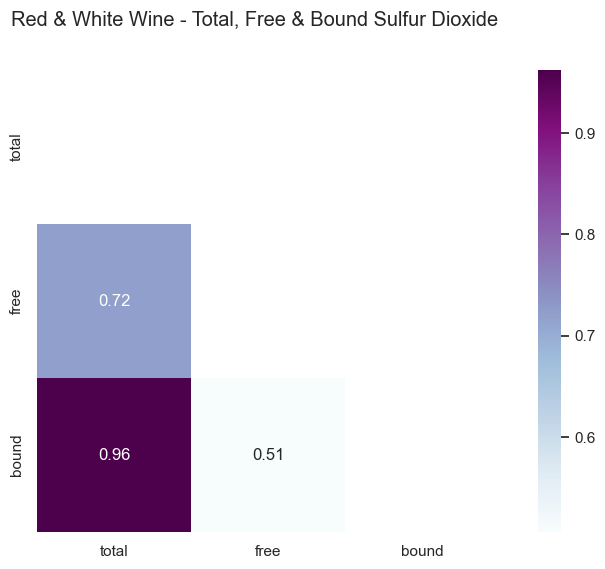

In [35]:
sns.set_theme(rc = {'figure.figsize':(10,6)}, style='white')
plt.suptitle('Red & White Wine - Total, Free & Bound Sulfur Dioxide')
so2_combined = combined[sulfur_dioxides]
so2_combined.columns = so2_combined.columns.str.replace("_sulfur_dioxide", "")
so2_combined_corr = so2_combined.corr()
sns.heatmap(
  so2_combined_corr, 
  annot=True, 
  mask = np.triu(np.ones_like(so2_combined_corr, dtype=bool)),
  square=True,
  cmap="BuPu"
)


plt.show()

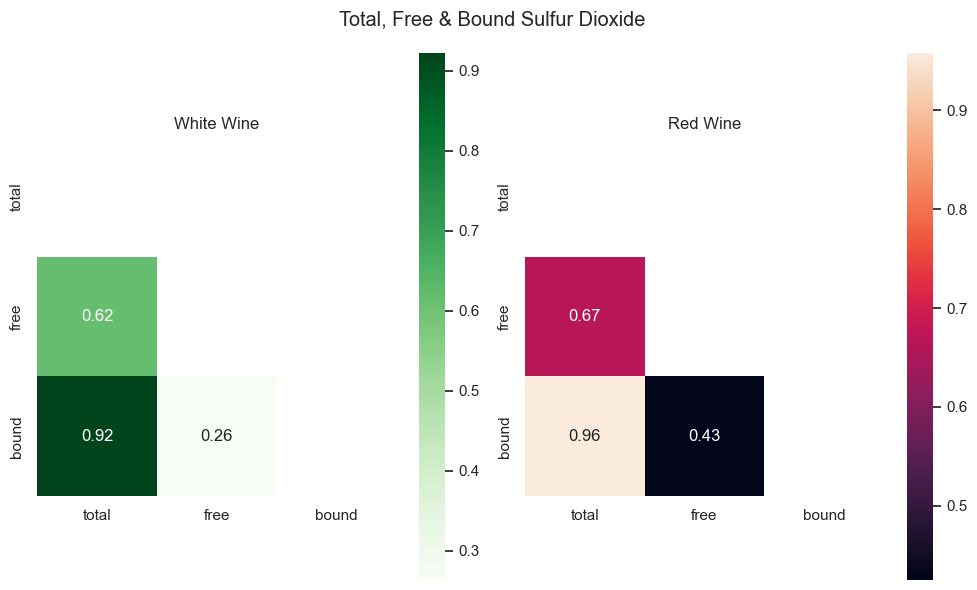

In [36]:
sns.set_theme(rc = {'figure.figsize':(10,6)}, style='white')

so2_white = white[sulfur_dioxides]
so2_white.columns = so2_white.columns.str.replace("_sulfur_dioxide", "")
so2_white_corr = so2_white.corr()

so2_red = red[sulfur_dioxides]
so2_red.columns = so2_red.columns.str.replace("_sulfur_dioxide", "")
so2_red_corr = so2_red.corr()

fig8, ax8 = plt.subplots(1, 2, tight_layout=True)
plt.suptitle('Total, Free & Bound Sulfur Dioxide')
ax8[0].set_title("White Wine")
ax8[1].set_title("Red Wine")

sns.heatmap(
  so2_white_corr, 
  annot=True, 
  mask = np.triu(np.ones_like(so2_white_corr, dtype=bool)),
  square=True,
  cmap="Greens",
  ax=ax8[0]
)

sns.heatmap(
  so2_red_corr, 
  annot=True, 
  mask = np.triu(np.ones_like(so2_red_corr, dtype=bool)),
  square=True,
  ax=ax8[1]
)

plt.show()

In [37]:
F, p = stats.f_oneway(
  white[white['quality_label'] == 'low']['bound_sulfur_dioxide'],
  white[white['quality_label'] == 'medium']['bound_sulfur_dioxide'],
  white[white['quality_label'] == 'high']['bound_sulfur_dioxide']
)

F2, p2 = stats.f_oneway(
  white[white['quality_label'] == 'low']['total_sulfur_dioxide'],
  white[white['quality_label'] == 'medium']['total_sulfur_dioxide'],
  white[white['quality_label'] == 'high']['total_sulfur_dioxide']
)

print('Bound: \nF: ', F, '\np: ', p)
print('Total: \nF: ', F2, '\np: ', p2)

Bound: 
F:  117.81157942771983 
p:  1.0674856539492219e-50
Total: 
F:  76.66028143448855 
p:  1.650541621040454e-33


In [38]:
rw_palette = { 'red': '#BA3658', 'white': '#36BA98' }
hml_palette = { 'high': '#36BA98', 'medium': '#BA9836', 'low': '#9836BA' }

Text(0, 0.5, 'Total SO2')

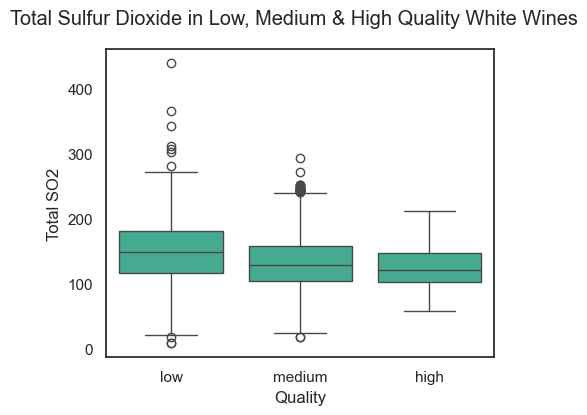

In [39]:
# Reference plot 1
sns.set_theme(rc = {'figure.figsize':(5,4)}, style='white')
df = sns.load_dataset('iris')
sns.boxplot(x='quality_label', y='total_sulfur_dioxide', data=white, color='#36BA98')

plt.suptitle('Total Sulfur Dioxide in Low, Medium & High Quality White Wines')
plt.xlabel('Quality')
plt.ylabel('Total SO2')



<Axes: xlabel='quality_label', ylabel='residual_sugar'>

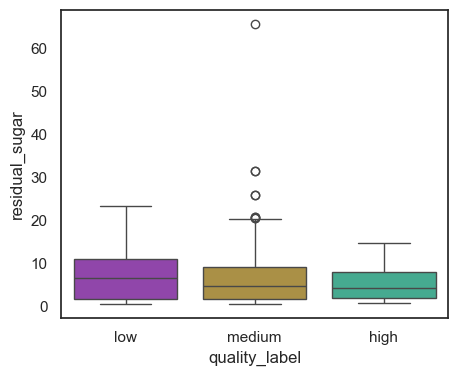

In [40]:
sns.set_theme(rc = {'figure.figsize':(5,4)}, style='white')
sns.boxplot(x='quality_label', y='residual_sugar', data=white, palette=hml_palette, hue='quality_label')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,color,bound_sulfur_dioxide
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,medium,white,152.0


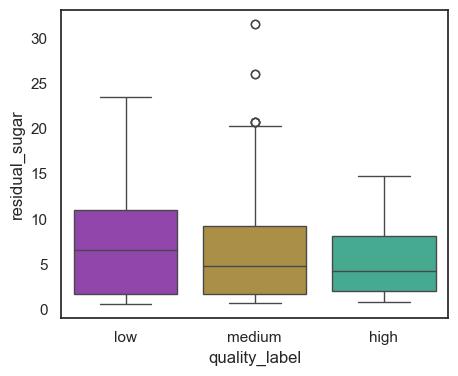

In [41]:
outlier = white[white['residual_sugar'] > 60] # the one sweet wine leon mentioned
sns.boxplot(x='quality_label', y='residual_sugar', data=white.drop(outlier.index), palette=hml_palette, hue='quality_label')
outlier

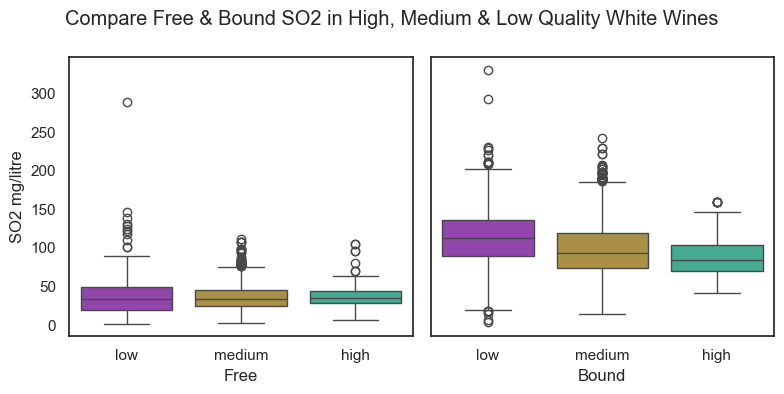

In [42]:
# sns.boxplot(white['free sulfur dioxide'])

sns.set_theme(rc = {'figure.figsize':(8,4)}, style='white')

# fig7, ax7 = plt.subplots(1, 3, tight_layout=True, sharey='row')
fig7, ax7 = plt.subplots(1, 2, tight_layout=True, sharey='row')

sns.boxplot(data=white, x='quality_label', y='free_sulfur_dioxide', ax=ax7[0], palette=hml_palette, hue='quality_label')
sns.boxplot(data=white, x='quality_label', y='bound_sulfur_dioxide', ax=ax7[1], palette=hml_palette, hue='quality_label')
# sns.boxplot(data=white, x='quality_label', y='total_sulfur_dioxide', ax=ax7[2], palette='rainbow', hue='quality_label')

ax7[0].set_xlabel('Free')
ax7[1].set_xlabel('Bound')
# ax7[2].set_xlabel('Total')

ax7[0].set_ylabel("SO2 mg/litre")

plt.suptitle('Compare Free & Bound SO2 in High, Medium & Low Quality White Wines')

plt.show()

<Axes: xlabel='bound_sulfur_dioxide', ylabel='residual_sugar'>

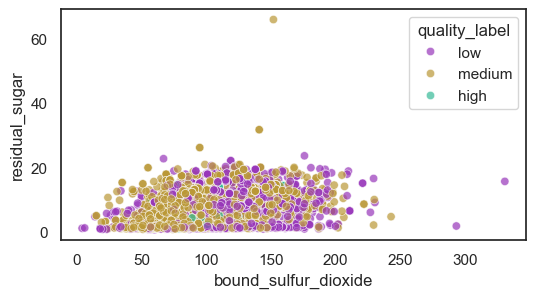

In [43]:
sns.set_theme(rc = {'figure.figsize':(6,3)}, style='white')

sns.scatterplot(data=white, x='bound_sulfur_dioxide', y='residual_sugar', hue='quality_label', alpha=0.7, palette=hml_palette)

Text(0.5, 0, 'Density (g/mL)')

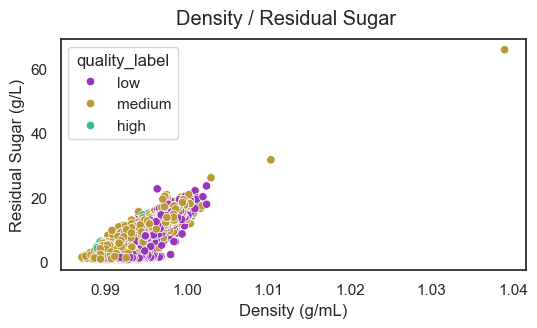

In [44]:
sns.set_theme(rc = {'figure.figsize':(6,3)}, style='white')
sns.scatterplot(data=white, x='density', y='residual_sugar', hue='quality_label', palette=hml_palette)
plt.suptitle('Density / Residual Sugar')
plt.ylabel('Residual Sugar (g/L)')
plt.xlabel('Density (g/mL)')